# <center> Neural Network with Tensorflow </center>



In [9]:
import numpy             as np
import sklearn           as sk
import pandas            as pd
import matplotlib.pyplot as plt
import tensorflow        as tf
import tensorboard       as tb

%load_ext tensorboard

from tensorflow.keras.layers     import Dense
from tensorflow.keras.utils      import to_categorical
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection     import train_test_split

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [2]:

mnist = pd.read_csv("./mnist_train_small.csv", header=None, sep=';').values

X, Y = mnist[:, 1:], mnist[:, 0:1]

In [3]:
Xt = X / 255
Yt = to_categorical(Y, 10)

X_train, X_test, Y_train, Y_test = train_test_split(Xt, Yt, train_size=0.7)

In [4]:
model = tf.keras.Sequential()

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [5]:
model.compile(optimizer=SGD(lr=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])      

In [6]:
logdir = "logs/MNIST-DENSE"


tf.profiler.experimental.start(logdir, tf.profiler.experimental.ProfilerOptions(host_tracer_level=2))


arr = model.fit(X_train, Y_train,
              batch_size=64,
              validation_data=(X_test, Y_test), epochs=20)

tf.profiler.experimental.stop()

Epoch 1/20
219/219 [==============================] - 1s 5ms/step - loss: 0.7283 - accuracy: 0.7830 - val_loss: 0.3292 - val_accuracy: 0.9043
Epoch 2/20
219/219 [==============================] - 1s 4ms/step - loss: 0.2863 - accuracy: 0.9129 - val_loss: 0.2982 - val_accuracy: 0.9132
Epoch 3/20
219/219 [==============================] - 1s 4ms/step - loss: 0.2082 - accuracy: 0.9351 - val_loss: 0.2239 - val_accuracy: 0.9355
Epoch 4/20
219/219 [==============================] - 1s 4ms/step - loss: 0.1625 - accuracy: 0.9514 - val_loss: 0.1946 - val_accuracy: 0.9412
Epoch 5/20
219/219 [==============================] - 1s 6ms/step - loss: 0.1303 - accuracy: 0.9630 - val_loss: 0.1852 - val_accuracy: 0.9503
Epoch 6/20
219/219 [==============================] - 1s 4ms/step - loss: 0.1079 - accuracy: 0.9683 - val_loss: 0.1638 - val_accuracy: 0.9520
Epoch 7/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0874 - accuracy: 0.9744 - val_loss: 0.1595 - val_accuracy: 0.9543
Epoch 

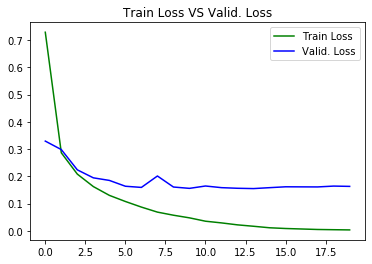

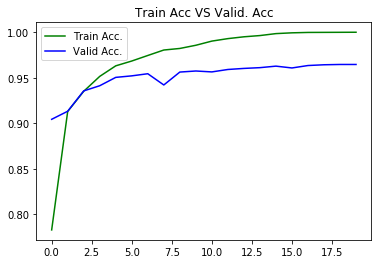

In [7]:
plt.title("Train Loss VS Valid. Loss")
plt.plot(arr.history['loss'],     c="green")
plt.plot(arr.history['val_loss'], c="blue" )
plt.legend(['Train Loss', 'Valid. Loss'])
plt.show()

plt.title("Train Acc VS Valid. Acc")
plt.plot(arr.history['accuracy'], c="green")
plt.plot(arr.history['val_accuracy'], c="blue" )
plt.legend(['Train Acc.', 'Valid Acc.'])
plt.show()

In [2]:
%tensorboard --logdir "logs/MNIST-DENSE" --host 127.0.0.13 --port 8080


ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 3140.

In [10]:

idxs = np.random.choice(X_test.shape[0], 100, replace=False)
lbls = np.argmax(model.predict(X_test[idxs, :]), axis=1)

wrong = idxs[np.argmax(Y_test[idxs], axis=1) != lbls]

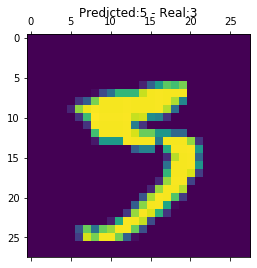

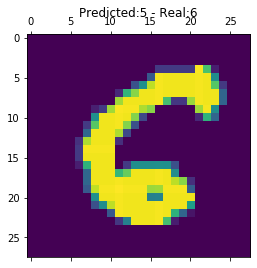

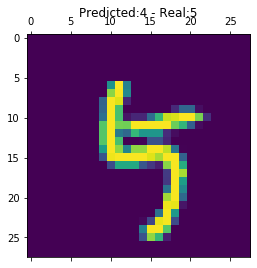

In [11]:
for i in wrong: 
    plt.matshow(X_test[i,:].reshape(28, 28))
    plt.title("Predicted:" + str(np.argmax(model.predict(X_test[i:i+1,:]))) + 
                " - Real:" + str(np.argmax(Y_test[i:i+1,:])))
    
    plt.show()